In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('processed_response.zip')

# LDA 
LDA is a generative probabilistic model that assumes each topic is a mixture over an underlying set of words, and each document is a mixture of over a set of topic probabilities.

Main idea 
- Every documents is a mixture of topics. e.g. Document 1 is 90% topic A and 10% topic B, while Document 2 is 30% topic A and 70% topic B.

- Every topic is a mixture of words. e.g. two-topic model of American news, with one topic for “politics” and one for “entertainment.” The most common words in the politics topic might be “President”, “Congress”, and “government”, while the entertainment topic may be made up of words such as “movies”, “television”, and “actor”.

Three main parts of LDA

1. Dimensionality Reduction: Rather than representing a text T in its feature space as `{Word_i: count(Word_i, T) for Word_i in Vocabulary}`, you can represent it in a topic space as `{Topic_i: Weight(Topic_i, T) for Topic_i in Topics}`.
2. Unsupervised Learning: By doing topic modeling, we build clusters of words rather than clusters of texts. A text is thus a mixture of all the topics, each having a specific weight.
3. Tagging: abstract “topics” that occur in a collection of documents that best represents the information in them.

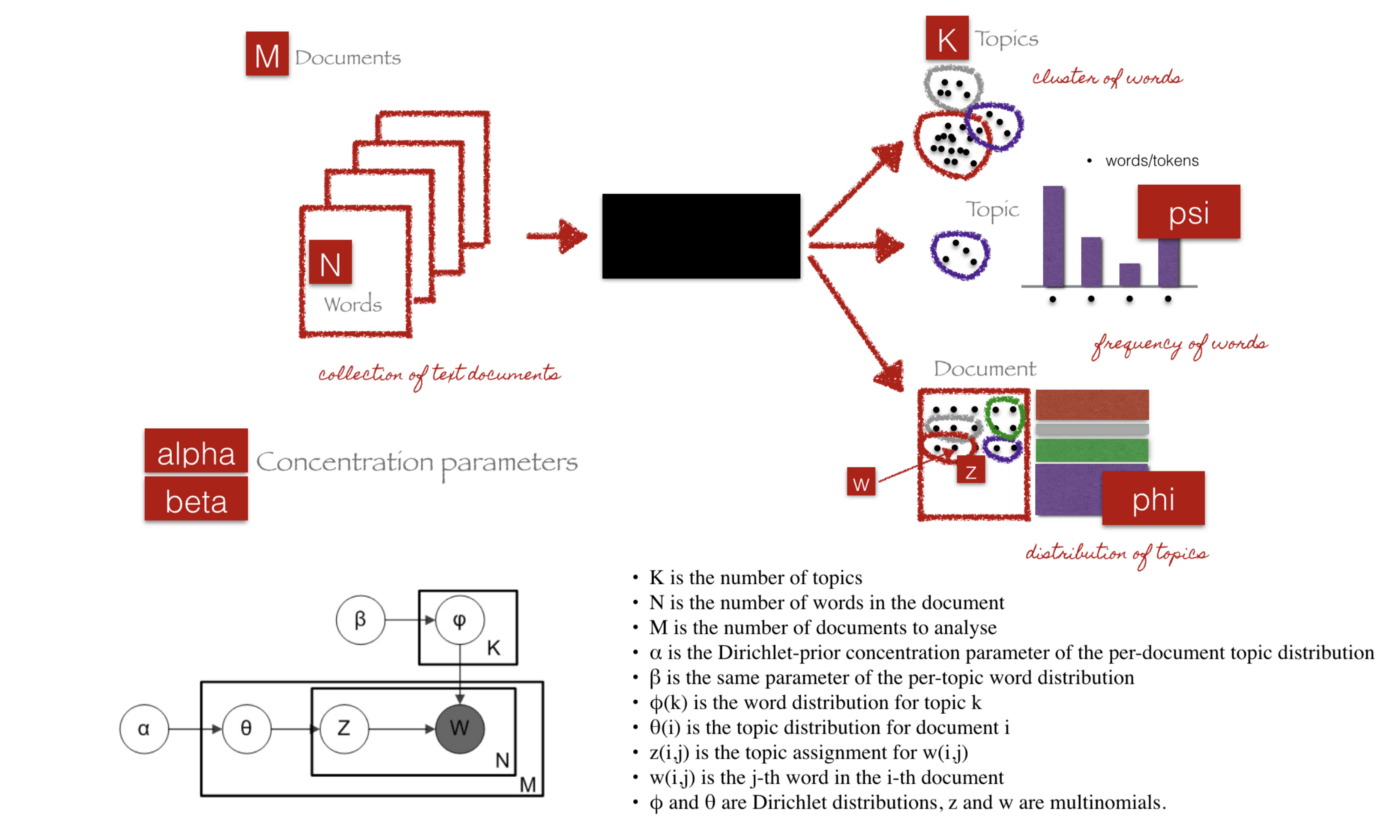

- psi, the distribution of words for each topic K
- phi, the distribution of topics for each document i
- $\alpha$: parameter is Dirichlet prior concentration parameter that represents document-topic density — with a higher alpha, documents are assumed to be made up of more topics and result in more specific topic distribution per document.
- $\beta$: is the same prior concentration parameter that represents topic-word density — with high beta, topics are assumed to made of up most of the words and result in a more specific word distribution per topic.

- what is lambda? 
- how to intperpret the result of the topics? 


## Running LDA using bags of words

In [3]:
import gensim
import gensim.corpora as corpora

In [4]:
from ast import literal_eval

df['clean_responses'] = df['clean_responses'].apply(literal_eval)

In [5]:
# Create Dictionary
id2word = corpora.Dictionary(df['clean_responses'])
# Create Corpus
texts = df['clean_responses']
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)]


In [6]:
#times a word appears 
corpus_0 = corpus[0]
for i in range(len(corpus_0)):
    print("Word {} (\"{}\") appears {} time.".format(corpus_0[i][0], id2word[corpus_0[i][0]], corpus_0[i][1]))

Word 0 ("abstract") appears 1 time.
Word 1 ("answer") appears 1 time.
Word 2 ("approach") appears 1 time.
Word 3 ("attack") appears 1 time.
Word 4 ("construct") appears 1 time.
Word 5 ("focus") appears 1 time.
Word 6 ("form") appears 1 time.
Word 7 ("framework") appears 2 time.
Word 8 ("good") appears 1 time.
Word 9 ("hard") appears 1 time.
Word 10 ("instead") appears 1 time.
Word 11 ("knowledg") appears 1 time.
Word 12 ("matt") appears 1 time.
Word 13 ("moral") appears 1 time.
Word 14 ("plato") appears 1 time.
Word 15 ("poll") appears 1 time.
Word 16 ("preparatori") appears 1 time.
Word 17 ("set") appears 1 time.
Word 18 ("specif") appears 1 time.
Word 19 ("strength") appears 1 time.
Word 20 ("veri") appears 1 time.
Word 21 ("weak") appears 1 time.
Word 22 ("whole") appears 1 time.
Word 23 ("would") appears 1 time.


In [7]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())

[(0,
  '0.009*"would" + 0.008*"time" + 0.008*"emot" + 0.008*"one" + 0.007*"audienc" '
  '+ 0.007*"peopl" + 0.007*"use" + 0.006*"differ" + 0.006*"mean" + '
  '0.006*"like"'),
 (1,
  '0.015*"use" + 0.014*"data" + 0.011*"hypothesi" + 0.010*"test" + '
  '0.008*"theori" + 0.007*"sampl" + 0.006*"observ" + 0.006*"differ" + '
  '0.006*"result" + 0.006*"find"'),
 (2,
  '0.009*"becaus" + 0.009*"differ" + 0.008*"group" + 0.008*"think" + '
  '0.007*"social" + 0.006*"like" + 0.006*"one" + 0.006*"also" + '
  '0.006*"argument" + 0.006*"would"'),
 (3,
  '0.015*"would" + 0.013*"problem" + 0.012*"one" + 0.010*"use" + '
  '0.009*"becaus" + 0.008*"solut" + 0.006*"time" + 0.006*"make" + 0.006*"need" '
  '+ 0.006*"like"'),
 (4,
  '0.009*"use" + 0.009*"node" + 0.008*"word" + 0.008*"student" + 0.006*"would" '
  '+ 0.006*"present" + 0.006*"becaus" + 0.006*"citi" + 0.006*"n" + '
  '0.005*"one"'),
 (5,
  '0.021*"x" + 0.016*"valu" + 0.013*"p" + 0.012*"would" + 0.010*"use" + '
  '0.009*"compani" + 0.008*"b" + 0.00

In [24]:
#print the top 20 words in each topics 
topics_matrix = lda_model.show_topics(formatted=False, num_words=20)
topics_matrix = np.array(topics_matrix)
topic_words = topics_matrix[:,1]

for i in topic_words:
    print([str(word[0]) for word in i])
    print()

['would', 'time', 'emot', 'one', 'audienc', 'peopl', 'use', 'differ', 'mean', 'like', 'becaus', 'exampl', 'also', 'effect', 'music', 'understand', 'read', 'feel', 'googl', 'make']

['use', 'data', 'hypothesi', 'test', 'theori', 'sampl', 'observ', 'differ', 'result', 'find', 'studi', 'becaus', 'one', 'would', 'activ', 'distribut', 'also', 'research', 'mean', 'base']

['becaus', 'differ', 'group', 'think', 'social', 'like', 'one', 'also', 'argument', 'would', 'cultur', 'exampl', 'use', 'peopl', 'make', 'could', 'experi', 'way', 'chang', 'reason']

['would', 'problem', 'one', 'use', 'becaus', 'solut', 'time', 'make', 'need', 'like', 'function', 'algorithm', 'take', 'peopl', 'solv', 'could', 'tree', 'differ', 'also', 'number']

['use', 'node', 'word', 'student', 'would', 'present', 'becaus', 'citi', 'n', 'one', 'make', 'chang', 'choic', 'like', 'way', 'case', 'also', 'b', 'exampl', 'negat']

['x', 'valu', 'p', 'would', 'use', 'compani', 'b', 'probabl', 'becaus', 'increas', 'n', 'mean', 'c'

/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_4863/4262890021.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  topics_matrix = np.array(topics_matrix)


In [8]:
import pyLDAvis
# import pyLDAvis.gensim
import pyLDAvis.gensim_models as gensimvis
import os
import pickle 

# Visualize the topics
pyLDAvis.enable_notebook()

In [9]:
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)

/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reloa

In [10]:
pyLDAvis.display(LDAvis_prepared)

The relevance metric: $\lambda$

- $\lambda$ = 1: ranking soley by probability is decending order 
- $\lambda$ = 0: ranking soley by the lift. lift = the ratio of a term’s probability within a topic to its marginal probability across the corpus. It generally decreases with globally frequent terms. But it can be noisy too if the rare terms only occur in one single topic.

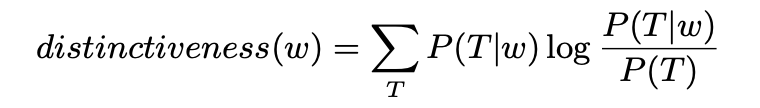

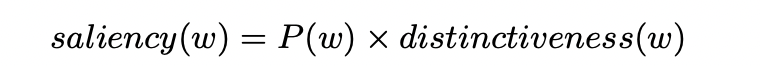

$P(T|w)$: the likelihood that observed word $w$ was generated by latent topic $T$. We use it to determine how informative a specific word $w$ can inform the topics. If word tells little of the topic mixture it will receive a low distinctiveness score. 


In [11]:
pyLDAvis.save_html(LDAvis_prepared, 'lda.html')

## Running LDA using tf-idf 

In [12]:
from gensim import corpora, models

tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# Build LDA model on tf-idf
lda_model_tf = gensim.models.LdaMulticore(corpus=corpus_tfidf,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model_tf.print_topics())

[(0,
  '0.007*"student" + 0.006*"present" + 0.006*"poll" + 0.005*"complet" + '
  '0.005*"audienc" + 0.003*"argument" + 0.003*"music" + 0.003*"use" + '
  '0.003*"peopl" + 0.003*"cultur"'),
 (1,
  '0.003*"use" + 0.003*"p" + 0.003*"would" + 0.002*"differ" + 0.002*"becaus" + '
  '0.002*"think" + 0.002*"valu" + 0.002*"problem" + 0.002*"one" + '
  '0.002*"treatment"'),
 (2,
  '0.004*"problem" + 0.003*"would" + 0.003*"node" + 0.003*"use" + '
  '0.003*"think" + 0.003*"one" + 0.003*"could" + 0.002*"becaus" + '
  '0.002*"differ" + 0.002*"time"'),
 (3,
  '0.004*"data" + 0.004*"use" + 0.003*"would" + 0.003*"model" + 0.003*"mean" + '
  '0.003*"distribut" + 0.003*"differ" + 0.003*"variabl" + 0.003*"function" + '
  '0.003*"one"'),
 (4,
  '0.003*"temperatur" + 0.003*"earth" + 0.003*"would" + 0.002*"co" + '
  '0.002*"becaus" + 0.002*"carbon" + 0.002*"chang" + 0.002*"increas" + '
  '0.002*"atmospher" + 0.002*"miner"'),
 (5,
  '0.006*"https" + 0.005*"com" + 0.005*"googl" + 0.005*"doc" + 0.005*"edit" + '


In [25]:
#print the top 20 words in each topics 
topics_matrix = lda_model_tf.show_topics(formatted=False, num_words=20)
topics_matrix = np.array(topics_matrix)
topic_words = topics_matrix[:,1]

for i in topic_words:
    print([str(word[0]) for word in i])
    print()

['student', 'present', 'poll', 'complet', 'audienc', 'argument', 'music', 'use', 'peopl', 'cultur', 'context', 'stori', 'thesi', 'think', 'would', 'narrat', 'make', 'emot', 'moral', 'one']

['use', 'p', 'would', 'differ', 'becaus', 'think', 'valu', 'problem', 'one', 'treatment', 'group', 'hypothesi', 'could', 'make', 'batna', 'need', 'time', 'activ', 'data', 'test']

['problem', 'would', 'node', 'use', 'think', 'one', 'could', 'becaus', 'differ', 'time', 'solut', 'make', 'peopl', 'need', 'exampl', 'like', 'help', 'work', 'algorithm', 'also']

['data', 'use', 'would', 'model', 'mean', 'distribut', 'differ', 'variabl', 'function', 'one', 'memori', 'valu', 'sampl', 'probabl', 'becaus', 'line', 'make', 'emot', 'like', 'think']

['temperatur', 'earth', 'would', 'co', 'becaus', 'carbon', 'chang', 'increas', 'atmospher', 'miner', 'differ', 'water', 'time', 'releas', 'system', 'use', 'one', 'nash', 'element', 'also']

['https', 'com', 'googl', 'doc', 'edit', 'document', 'argument', 'use', 'evi

/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_4863/697313039.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  topics_matrix = np.array(topics_matrix)


In [13]:
LDAvis_prepared_tf = gensimvis.prepare(lda_model_tf, corpus_tfidf, id2word)

/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/joblib/backports.py:36: De

In [14]:
pyLDAvis.display(LDAvis_prepared_tf)

In [15]:
pyLDAvis.save_html(LDAvis_prepared_tf, 'lda_tf.html')